# Business Understanding:
 E-commerce websites need to optimize their website design and marketing strategies to improve the user experience and increase the likelihood of conversion. By accurately predicting which sessions are likely to end with shopping, e-commerce websites can personalize their recommendations and marketing efforts, ultimately leading to increased sales and revenue.

# Data Understanding



In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df=pd.read_csv('online_shoppers_intention.csv')

In [65]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [66]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           



*   Dataset contains **18 attribute**.
*   **10** of which are **numeric** and **8** are **categorical**.
*   **"Revenue"** indicates whether the online shopper made a purchase or not.
*   "**Administrative**", "**Administrative Duration**", "**Informational**", "**Informational Duration**", "**Product Related**", and "**Product Related Duration**" represent the number of different types of pages visited by the visitor in that session and the total time spent in each of these page categories. 
*   "**Bounce Rate**" feature represents the percentage of visitors who enter the site from a specific page and leave without triggering any other requests to the analytics server during that session.
*   "**Exit Rate**" feature represents the percentage of pageviews to a specific page that were the last in the session.
*   "**Page Value**" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
*    "**Special Day**" feature indicates the closeness of the site visiting time to a specific special day, such as Valentine's Day or Mother's Day, in which the sessions are more likely to be finalized with a transaction.
*   The dataset also includes information about the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is on a weekend, and the month of the year.
*   Dataset have no null values.










In [68]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [69]:
T_Revenue=pd.DataFrame(df.groupby(['Revenue'], as_index=False).size())
T_Revenue

,Revenue,size
0,False,10422
1,True,1908


According to the data presented, there were 10,422 cases in which revenue was not generated (False) and 1,908 occurrences in which revenue was generated (True). This implies that the majority of incidents did not result in money, but a smaller portion did.

<ipython-input-71-3fd384a7b145>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


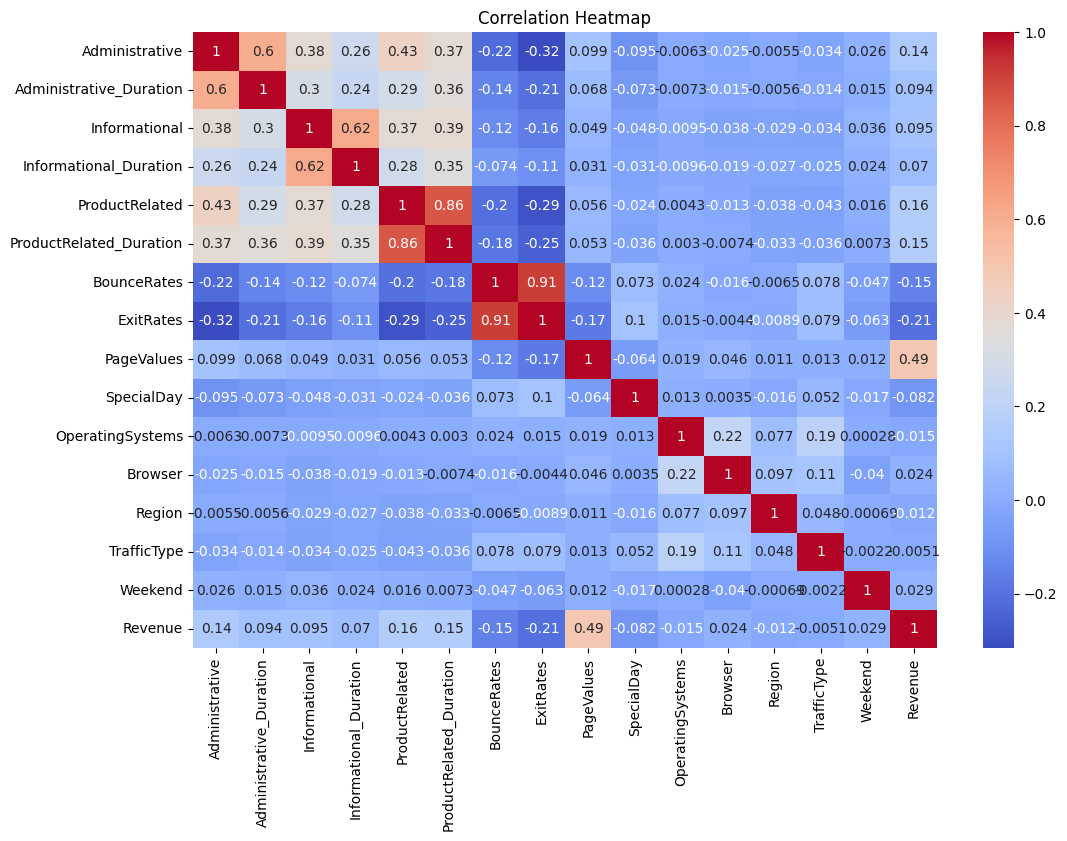

In [71]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The inverse relationship between bounce rate, exit rate, and revenue shows that as these measures rise, the likelihood of producing revenue falls. This means that high bounce and exit rates could contribute to lower revenue production. The significant association between page value and revenue, on the other hand, shows that pages with higher page values generate more money. As a result, enhancing website design, user experience, and page value can be critical in generating income while decreasing bounce rates and exit rates.



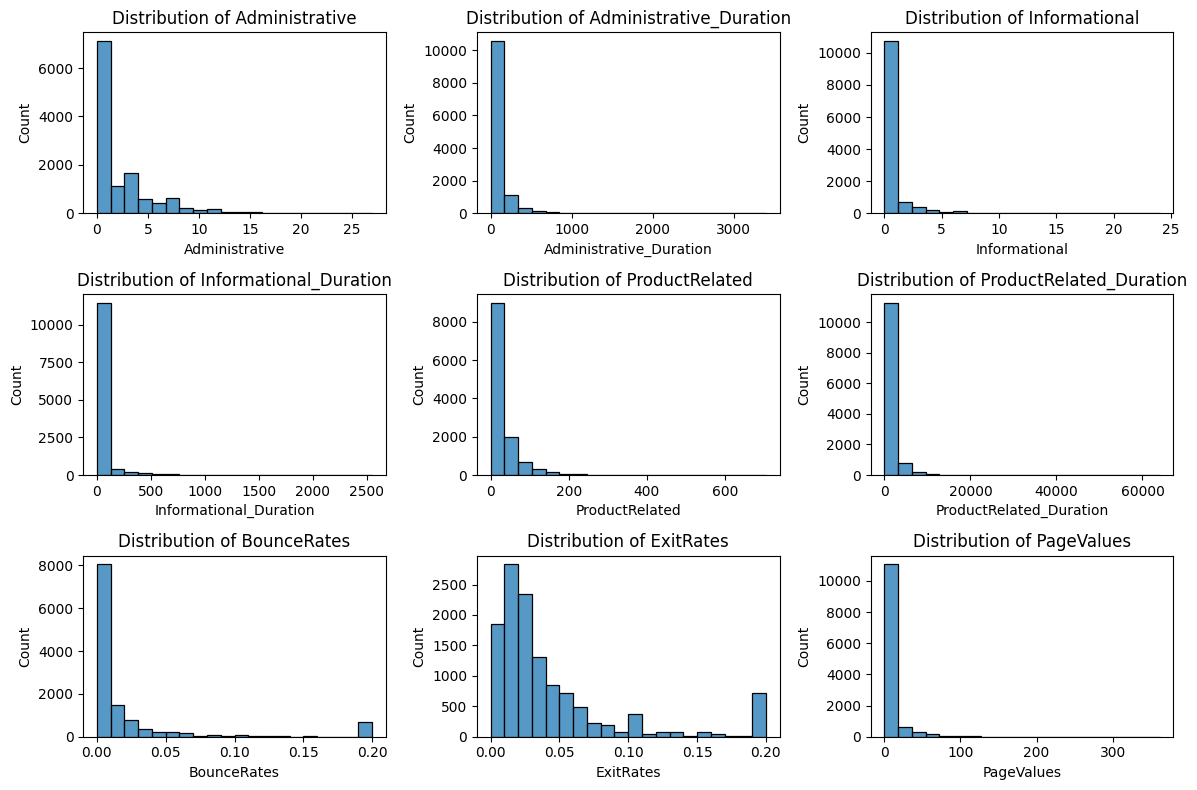

In [72]:
# Histograms for numerical columns
num_cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=col, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



In [73]:
# Correlation between Revenue and other attributes using data visualization.
# Type of visitor and revenue.
Vt= pd.DataFrame(df.groupby(['VisitorType','Revenue'], as_index=False).size())
Vt


,VisitorType,Revenue,size
0,New_Visitor,False,1272
1,New_Visitor,True,422
2,Other,False,69
3,Other,True,16
4,Returning_Visitor,False,9081
5,Returning_Visitor,True,1470


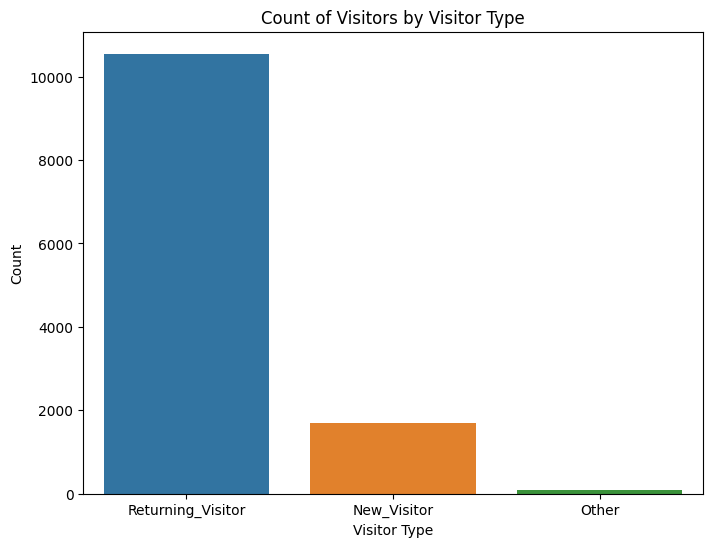

In [74]:
# Bar plot of 'VisitorType'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='VisitorType')
plt.title('Count of Visitors by Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.show()


While a higher number of recurring visits can show customer loyalty and satisfaction, it is also critical to attract and convert new visitors in order to continue growth and extend the customer base. For long-term business success, a balanced approach focused on both customer retention and acquisition is often suggested.

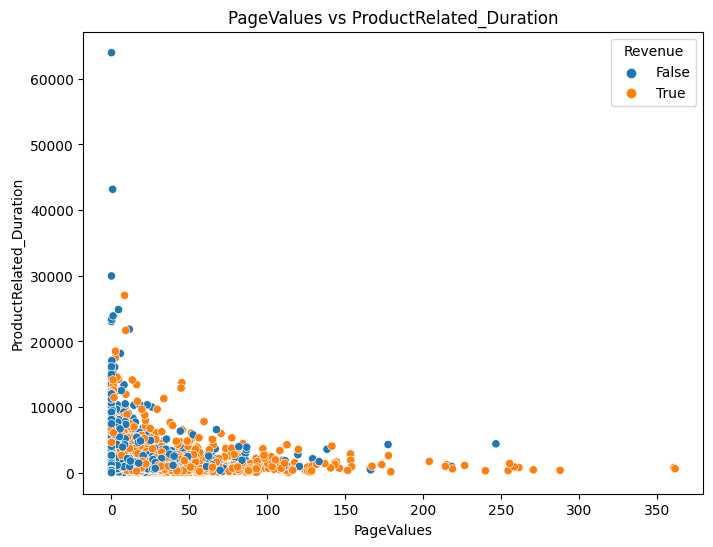

In [75]:
# Scatter plot of 'PageValues' vs 'ProductRelated_Duration'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PageValues', y='ProductRelated_Duration', hue='Revenue')
plt.title('PageValues vs ProductRelated_Duration')
plt.xlabel('PageValues')
plt.ylabel('ProductRelated_Duration')
plt.show()


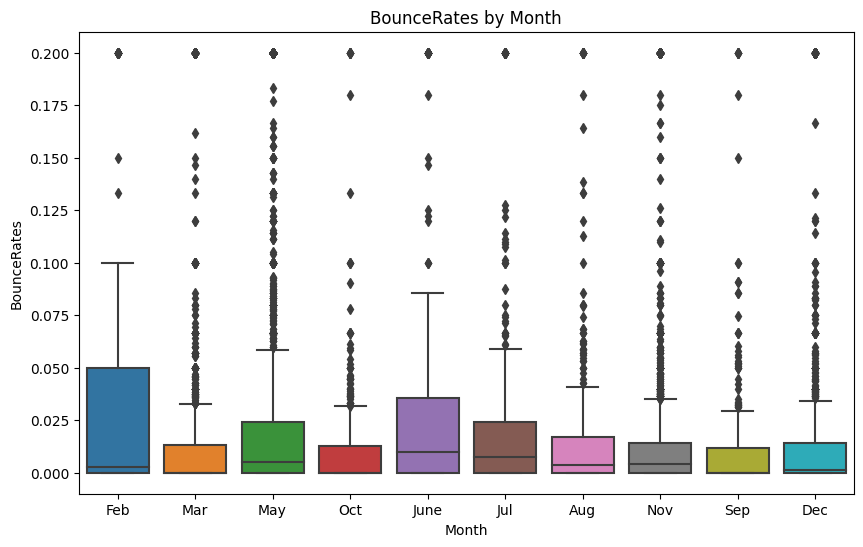

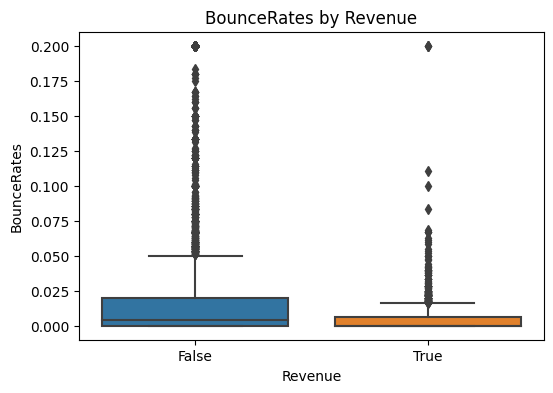

In [76]:

# Boxplot for 'BounceRates' grouped by 'Month'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Month', y='BounceRates')
plt.title('BounceRates by Month')
plt.xlabel('Month')
plt.ylabel('BounceRates')
plt.show()

# Boxplot for BounceRates by Revenue
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Revenue', y='BounceRates')
plt.title('BounceRates by Revenue')
plt.xlabel('Revenue')
plt.ylabel('BounceRates')
plt.show()

The graph shows that bounce rates are high in June and February, with multiple outliers. Seasonal trends, marketing campaign effectiveness, user experience difficulties, and extraordinary cases are all possible explanations. Taking steps to address these concerns, such as user behavior analysis, website optimization, and updated marketing techniques, can help reduce high bounce rates and improve overall website performance.

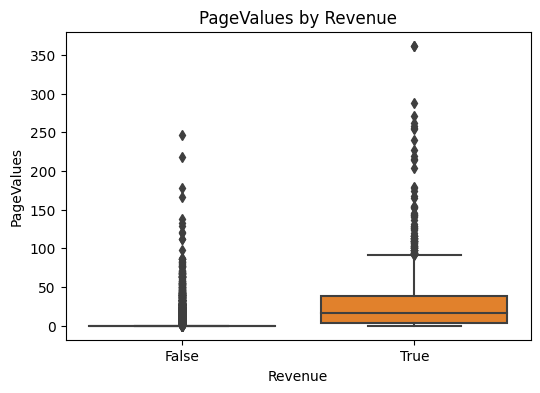

In [77]:
# Boxplot for PageValues by Revenue
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Revenue', y='PageValues')
plt.title('PageValues by Revenue')
plt.xlabel('Revenue')
plt.ylabel('PageValues')
plt.show()

The strong link between page values and revenue shows that higher-valued pages are more likely to generate revenue. This association is confirmed by the box plot, which shows greater median page values for revenue versus no revenue. This means that people who view sites with higher page values are more engaged and more likely to buy, whereas users who visit pages with lower page values may be less likely to convert. Optimizing page values can help increase income production on a website.

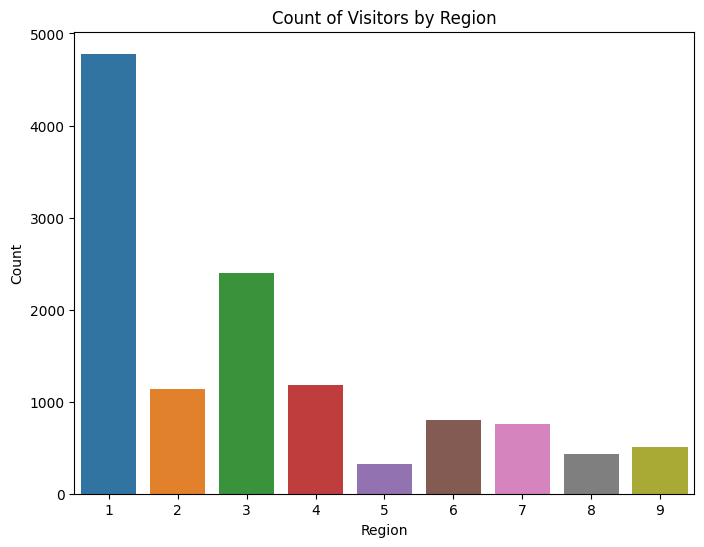

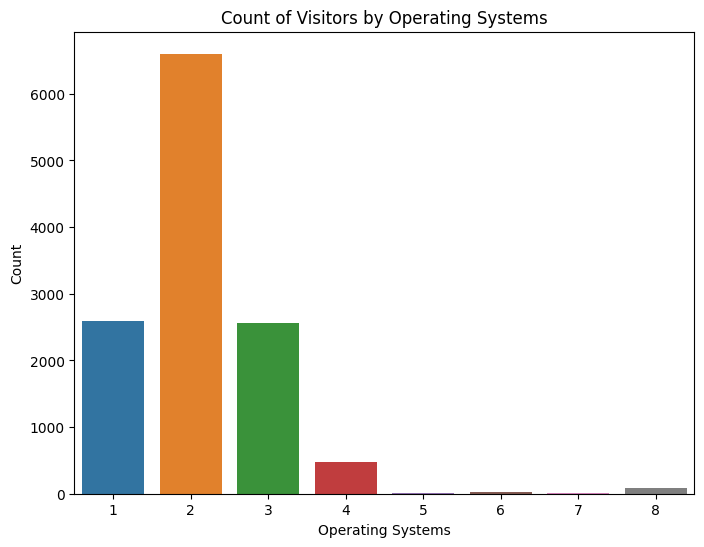

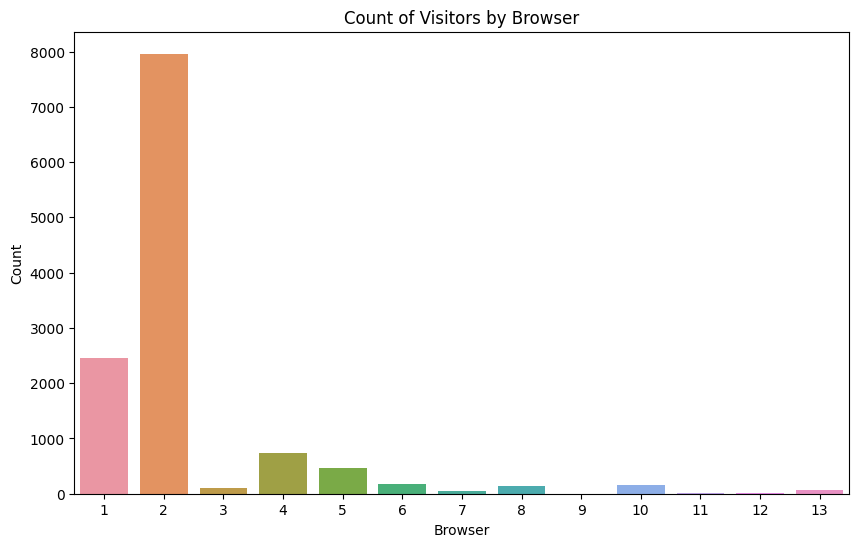

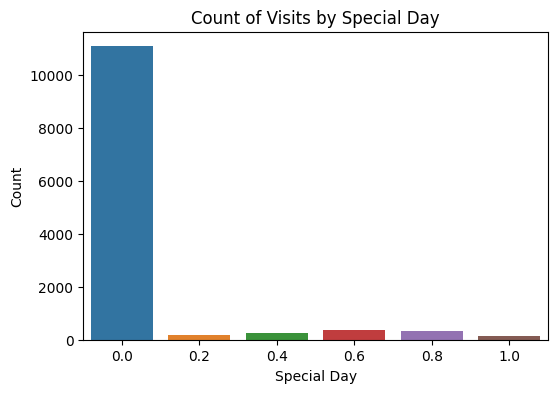

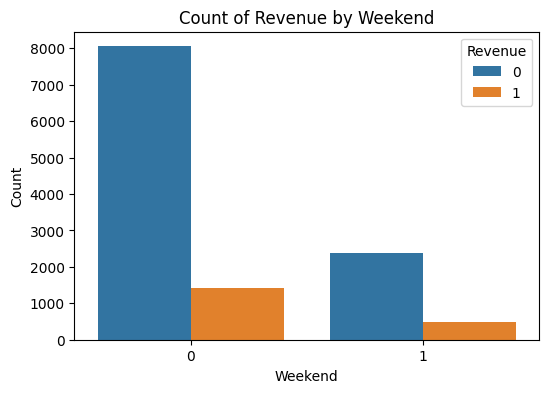

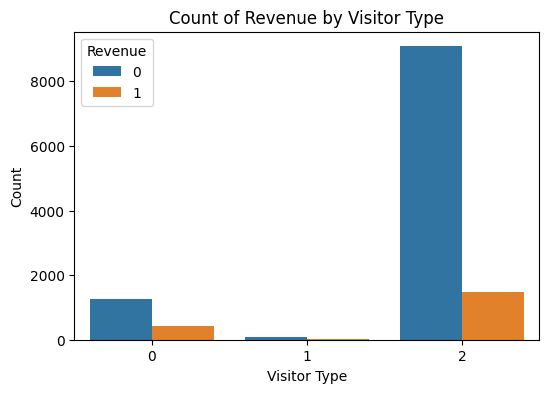

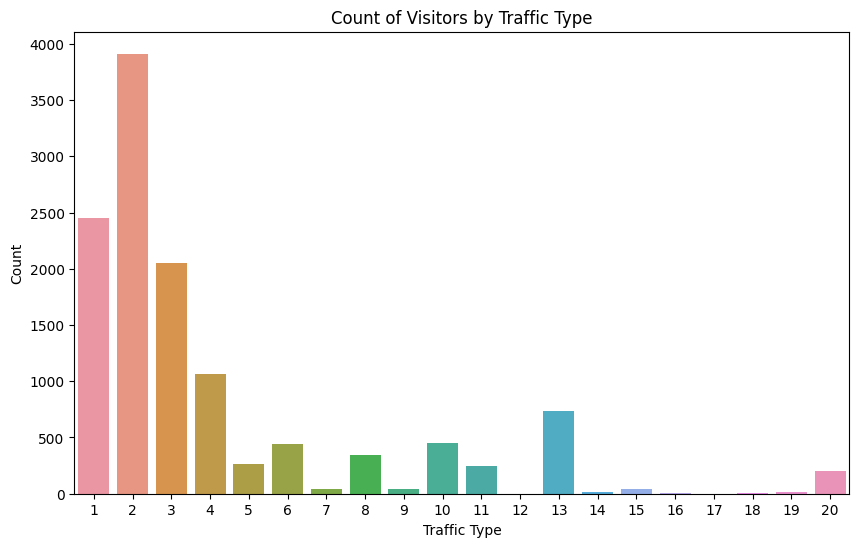

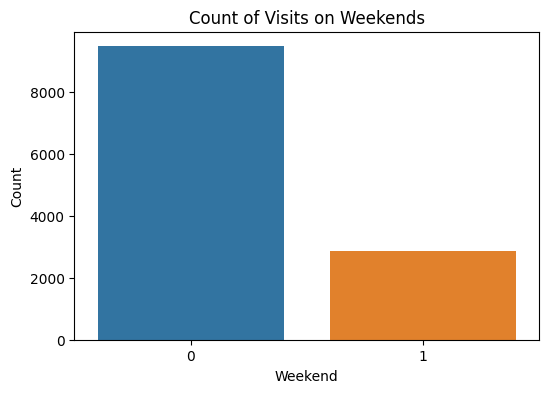

In [116]:
# Countplot of 'Region'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Region')
plt.title('Count of Visitors by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

# Countplot of OperatingSystems
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='OperatingSystems')
plt.title('Count of Visitors by Operating Systems')
plt.xlabel('Operating Systems')
plt.ylabel('Count')
plt.show()

# Countplot of Browser
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Browser')
plt.title('Count of Visitors by Browser')
plt.xlabel('Browser')
plt.ylabel('Count')
plt.show()

# Countplot of SpecialDay
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='SpecialDay')
plt.title('Count of Visits by Special Day')
plt.xlabel('Special Day')
plt.ylabel('Count')
plt.show()

# Countplot of Weekend by Revenue
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Weekend', hue='Revenue')
plt.title('Count of Revenue by Weekend')
plt.xlabel('Weekend')
plt.ylabel('Count')
plt.show()

# Countplot of VisitorType by Revenue
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='VisitorType', hue='Revenue')
plt.title('Count of Revenue by Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.show()

# Countplot of TrafficType
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TrafficType')
plt.title('Count of Visitors by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.show()


# Countplot of Weekend
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Weekend')
plt.title('Count of Visits on Weekends')
plt.xlabel('Weekend')
plt.ylabel('Count')
plt.show()



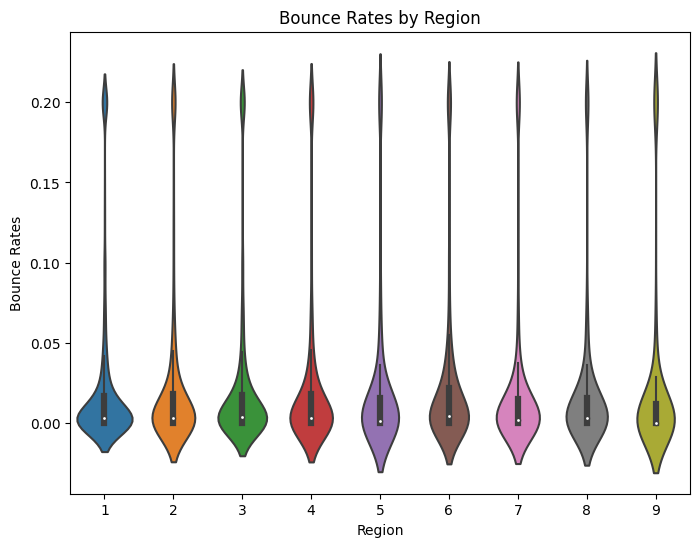

In [117]:
# Violin plot of BounceRates by Region
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Region', y='BounceRates')
plt.title('Bounce Rates by Region')
plt.xlabel('Region')
plt.ylabel('Bounce Rates')
plt.show()


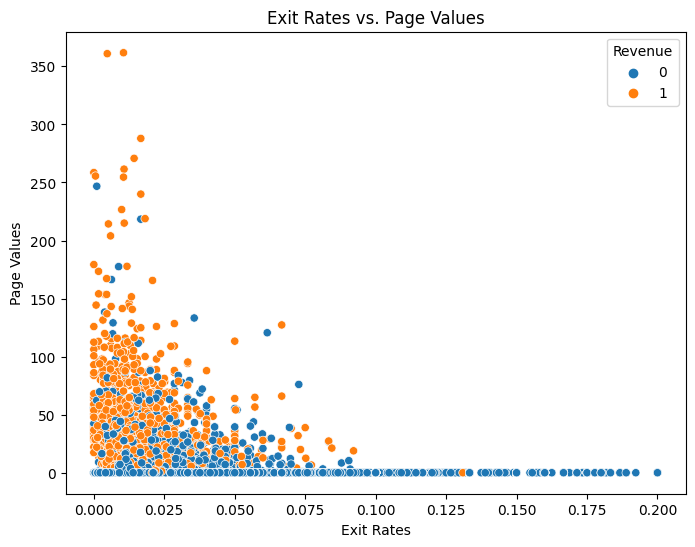

In [118]:
# Scatter plot of ExitRates vs. PageValues
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ExitRates', y='PageValues', hue='Revenue')
plt.title('Exit Rates vs. Page Values')
plt.xlabel('Exit Rates')
plt.ylabel('Page Values')
plt.show()



In [89]:
Bounce_Rate= pd.DataFrame(df.groupby(['BounceRates','Revenue'], as_index=False).size())
Bounce_Rate

,BounceRates,Revenue,size
0,0.000000,False,4482
1,0.000000,True,1036
2,0.000027,False,1
3,0.000034,False,1
4,0.000038,False,1
...,...,...,...
2126,0.176923,False,1
2127,0.180000,False,5
2128,0.183333,False,1
2129,0.200000,False,697


<ipython-input-90-fd971a2527c2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PageValues'])


<Axes: xlabel='PageValues', ylabel='Density'>

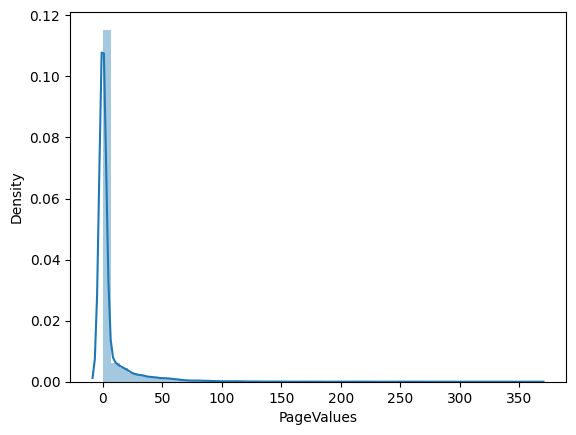

In [90]:
sns.distplot(df['PageValues'])

In [91]:
PgVal= pd.DataFrame(df.groupby(['PageValues','Revenue'], as_index=False).size())

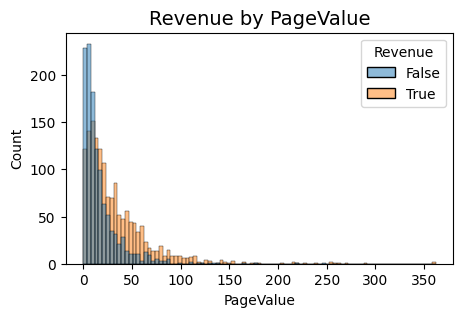

In [92]:
plt.figure(figsize=(5,3))
sns.histplot(data=PgVal, x='PageValues', hue='Revenue')
plt.title('Revenue by PageValue', fontsize = 14)
plt.xlabel('PageValue', fontsize = 10)
plt.show()


# Data Preparation

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE



In [94]:
# Loading the data
df = pd.read_csv('online_shoppers_intention.csv')

# Encoding the categorical variables as integers
le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = le.fit_transform(df['Weekend'])
df['Revenue'] = le.fit_transform(df['Revenue'])



In [95]:
# Splitting the data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Revenue', axis=1), df['Revenue'], test_size=0.3, random_state=42)

# SMOTE to balance the training data
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)



In [96]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Applying PCA
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)




# Modeling and Evaluation

Decision Tree Classifier Accuracy: 0.7620978642876453
Decision Tree Classifier Confusion Matrix:
 [[2479  645]
 [ 235  340]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.85      3124
           1       0.35      0.59      0.44       575

    accuracy                           0.76      3699
   macro avg       0.63      0.69      0.64      3699
weighted avg       0.83      0.76      0.79      3699



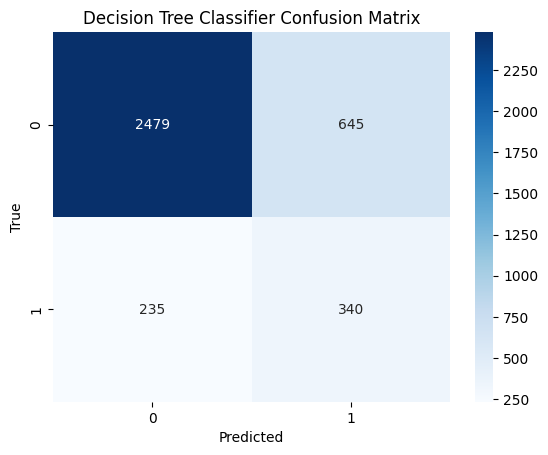

In [97]:
report_dict = {}

# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, dtc_pred))
print("Decision Tree Classifier Confusion Matrix:\n", confusion_matrix(y_test, dtc_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, dtc_pred))
report_dict['Decision Tree Classifier'] = classification_report(y_test, dtc_pred, output_dict=True)


import seaborn as sns
import matplotlib.pyplot as plt

# Decision Tree Classifier Confusion Matrix
dtc_cm = confusion_matrix(y_test, dtc_pred)
sns.heatmap(dtc_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Decision Tree Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Random Forest Classifier Accuracy: 0.8334685050013517
Random Forest Classifier Confusion Matrix:
 [[2743  381]
 [ 235  340]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      3124
           1       0.47      0.59      0.52       575

    accuracy                           0.83      3699
   macro avg       0.70      0.73      0.71      3699
weighted avg       0.85      0.83      0.84      3699



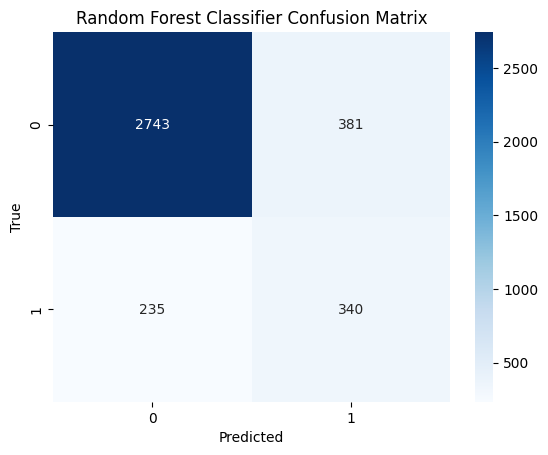

In [98]:

# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rfc_pred))
print("Random Forest Classifier Confusion Matrix:\n", confusion_matrix(y_test, rfc_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rfc_pred))
report_dict['Random Forest Classifier'] = classification_report(y_test, rfc_pred, output_dict=True)


# Random Forest Classifier Confusion Matrix
rfc_cm = confusion_matrix(y_test, rfc_pred)
sns.heatmap(rfc_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



XGBoost Classifier Accuracy: 0.8269802649364694
XGBoost Classifier Confusion Matrix:
 [[2701  423]
 [ 217  358]]
XGBoost Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89      3124
           1       0.46      0.62      0.53       575

    accuracy                           0.83      3699
   macro avg       0.69      0.74      0.71      3699
weighted avg       0.85      0.83      0.84      3699



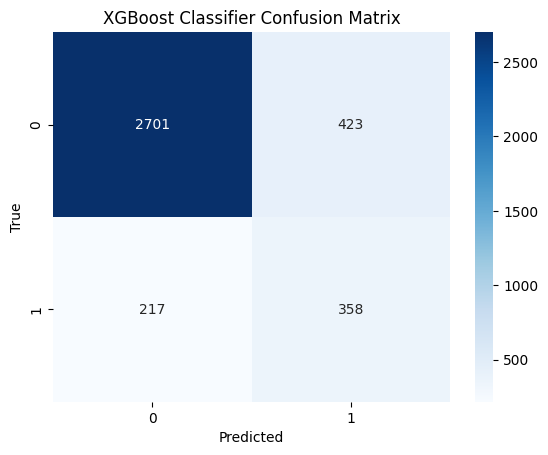

In [99]:
# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print("XGBoost Classifier Accuracy:", accuracy_score(y_test, xgb_pred))
print("XGBoost Classifier Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("XGBoost Tree Classification Report:\n", classification_report(y_test, xgb_pred))
report_dict['XGBoost Classifier'] = classification_report(y_test, xgb_pred, output_dict=True)


# XGBoost Classifier Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(xgb_cm, annot=True, cmap='Blues', fmt='g')
plt.title('XGBoost Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




Logistic Regression Classifier Accuracy: 0.7788591511219248
Logistic Regression Classifier Confusion Matrix:
 [[2521  603]
 [ 215  360]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86      3124
           1       0.37      0.63      0.47       575

    accuracy                           0.78      3699
   macro avg       0.65      0.72      0.66      3699
weighted avg       0.84      0.78      0.80      3699



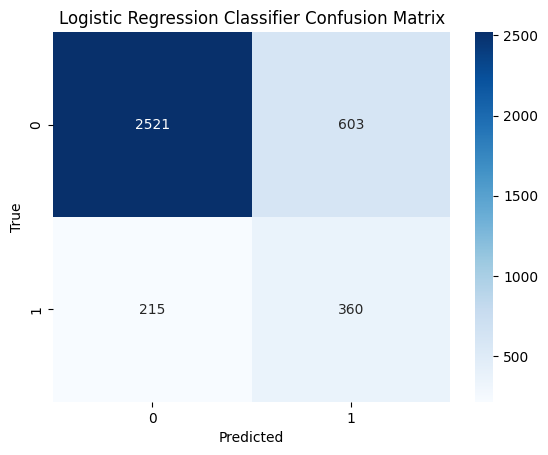

In [100]:
# Logistic Regression Classifier
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
print("Logistic Regression Classifier Accuracy:", accuracy_score(y_test, logreg_pred))
print("Logistic Regression Classifier Confusion Matrix:\n", confusion_matrix(y_test, logreg_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, logreg_pred))
report_dict['Logistic Regression Classifier'] = classification_report(y_test, logreg_pred, output_dict=True)

# Logistic Regression Classifier Confusion Matrix
logreg = confusion_matrix(y_test, logreg_pred)
sns.heatmap(logreg, annot=True, cmap='Blues', fmt='g')
plt.title('Logistic Regression Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


KNN Classifier Accuracy: 0.7872397945390646
KNN Classifier Confusion Matrix:
 [[2560  564]
 [ 223  352]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87      3124
           1       0.38      0.61      0.47       575

    accuracy                           0.79      3699
   macro avg       0.65      0.72      0.67      3699
weighted avg       0.84      0.79      0.81      3699



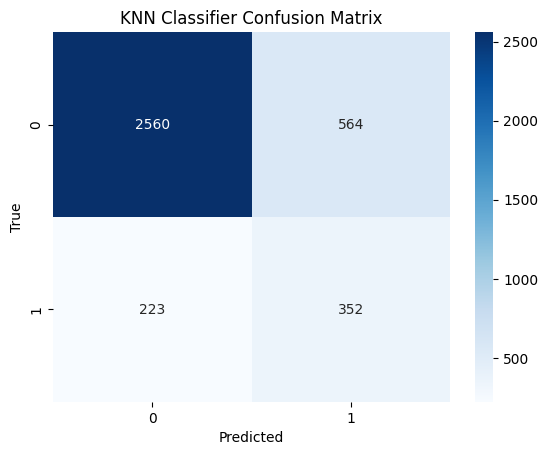

In [101]:



# KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KNN Classifier Accuracy:", accuracy_score(y_test, knn_pred))
print("KNN Classifier Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("KNN Classification Report:\n", classification_report(y_test, knn_pred))
report_dict['KNN Classifier'] = classification_report(y_test, knn_pred, output_dict=True)


# KNN Classifier Confusion Matrix
knn = confusion_matrix(y_test, knn_pred)
sns.heatmap(knn, annot=True, cmap='Blues', fmt='g')
plt.title('KNN Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


SVM Classifier Accuracy: 0.8129224114625574
SVM Classifier Confusion Matrix:
 [[2621  503]
 [ 189  386]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88      3124
           1       0.43      0.67      0.53       575

    accuracy                           0.81      3699
   macro avg       0.68      0.76      0.71      3699
weighted avg       0.86      0.81      0.83      3699



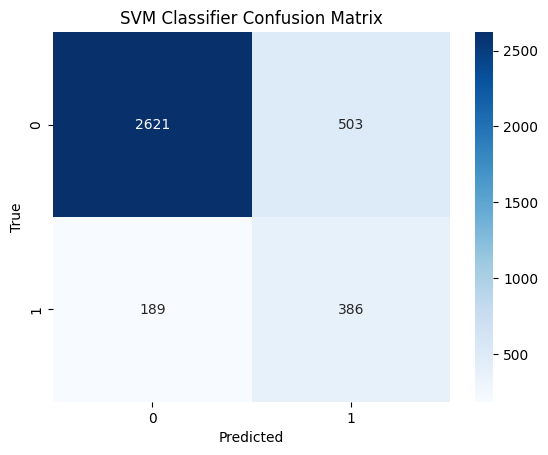

In [102]:

#SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("SVM Classifier Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Classifier Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))
report_dict['SVM Classifier'] = classification_report(y_test, svm_pred, output_dict=True)


# svm Classifier Confusion Matrix
svm = confusion_matrix(y_test, svm_pred)
sns.heatmap(svm, annot=True, cmap='Blues', fmt='g')
plt.title('SVM Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Gaussian Naive Bayes Classifier Accuracy: 0.6263855095971884
Gaussian Naive Bayes Classifier Confusion Matrix:
 [[1973 1151]
 [ 231  344]]
Gaussian Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.63      0.74      3124
           1       0.23      0.60      0.33       575

    accuracy                           0.63      3699
   macro avg       0.56      0.61      0.54      3699
weighted avg       0.79      0.63      0.68      3699



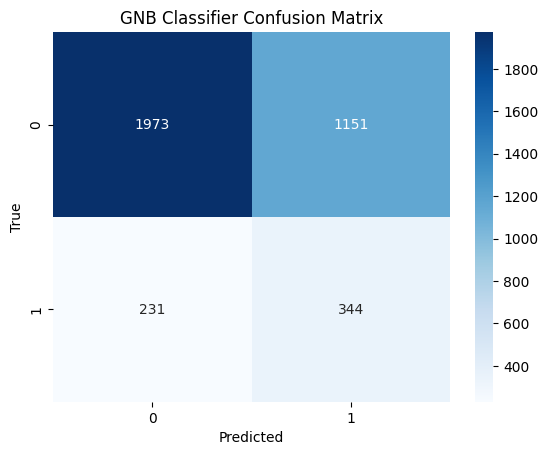

In [103]:
# Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
print("Gaussian Naive Bayes Classifier Accuracy:", accuracy_score(y_test, gnb_pred))
print("Gaussian Naive Bayes Classifier Confusion Matrix:\n", confusion_matrix(y_test, gnb_pred))
print("Gaussian Naive Bayes Classification Report:\n", classification_report(y_test, gnb_pred))
report_dict['Gaussian Naive Bayes Classifier'] = classification_report(y_test, gnb_pred, output_dict=True)


# gnb Classifier Confusion Matrix
gnb = confusion_matrix(y_test, gnb_pred)
sns.heatmap(gnb, annot=True, cmap='Blues', fmt='g')
plt.title('GNB Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



Multilayer Perceptron Classifier Accuracy: 0.83779399837794
Multilayer Perceptron Classifier Confusion Matrix:
 [[2678  446]
 [ 154  421]]
Multilayer Perceptron Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      3124
           1       0.49      0.73      0.58       575

    accuracy                           0.84      3699
   macro avg       0.72      0.79      0.74      3699
weighted avg       0.87      0.84      0.85      3699



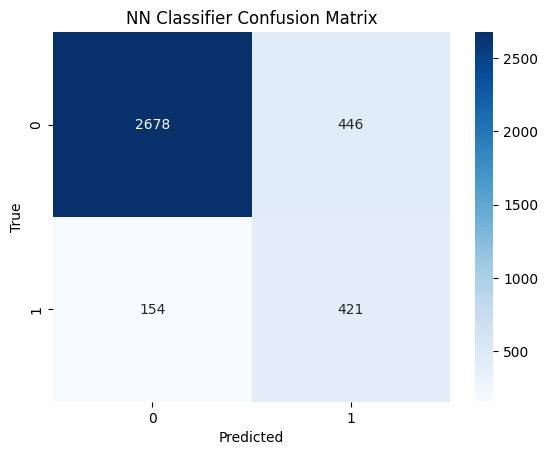

In [104]:
# Multilayer Perceptron Classifier(NN)
nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)
print("Multilayer Perceptron Classifier Accuracy:", accuracy_score(y_test, nn_pred))
print("Multilayer Perceptron Classifier Confusion Matrix:\n", confusion_matrix(y_test, nn_pred))
print("Multilayer Perceptron Classifier Classification Report:\n", classification_report(y_test, nn_pred))
report_dict['Multilayer Perceptron Classifier'] = classification_report(y_test, gnb_pred, output_dict=True)



# MPL Classifier Confusion Matrix
nn = confusion_matrix(y_test, nn_pred)
sns.heatmap(nn, annot=True, cmap='Blues', fmt='g')
plt.title('NN Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Based on the provided outcome of various classifiers for online shoppers' intention prediction, here are the accuracy results for each classifier:

Decision Tree Classifier: 76.2% accuracy

Random Forest Classifier: 83.34% accuracy

XGBoost Forest Classifier: 82.69% accuracy

Logistic Regression Classifier: 77.88% accuracy

KNN Classifier: 78.72% accuracy

SVM Classifier: 81.29% accuracy

Gaussian Naive Bayes Classifier: 62.62% accuracy

Multilayer Perceptron Classifier: 83.77% accuracy

The results reported here were achieved by combining Principal Component Analysis (PCA) and Standard Scaler preprocessing approaches. To investigate the model's performance without these specific characteristics, lets re-evaluate the classifiers without using PCA and Standard Scaler.

In [106]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Revenue', axis=1), df['Revenue'], test_size=0.3, random_state=42)

# Apply SMOTE to balance the training data
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)



Decision Tree Classifier Accuracy: 0.8394160583941606
Decision Tree Classifier Confusion Matrix:
 [[2732  392]
 [ 202  373]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      3124
           1       0.49      0.65      0.56       575

    accuracy                           0.84      3699
   macro avg       0.71      0.76      0.73      3699
weighted avg       0.86      0.84      0.85      3699



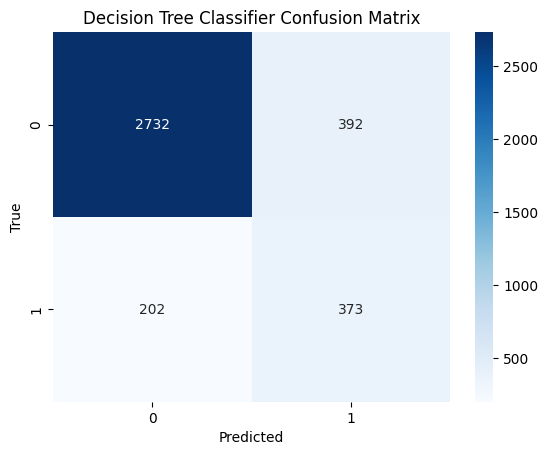

In [107]:
report_dict = {}


# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, dtc_pred))
print("Decision Tree Classifier Confusion Matrix:\n", confusion_matrix(y_test, dtc_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, dtc_pred))
report_dict['Decision Tree Classifier'] = classification_report(y_test, dtc_pred, output_dict=True)



# Decision Tree Classifier Confusion Matrix
dtc_cm = confusion_matrix(y_test, dtc_pred)
sns.heatmap(dtc_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Decision Tree Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Random Forest Classifier Accuracy: 0.8842930521762639
Random Forest Classifier Confusion Matrix:
 [[2853  271]
 [ 157  418]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      3124
           1       0.61      0.73      0.66       575

    accuracy                           0.88      3699
   macro avg       0.78      0.82      0.80      3699
weighted avg       0.89      0.88      0.89      3699



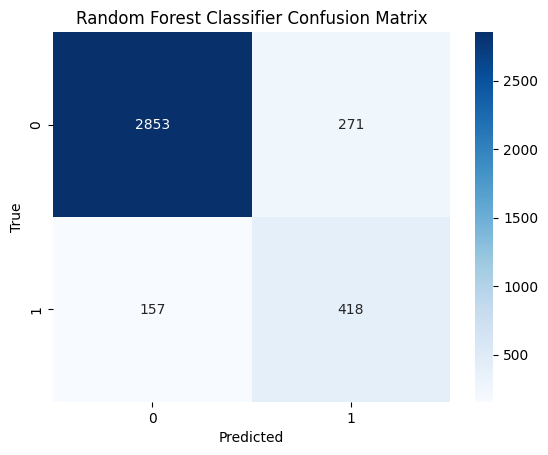

In [108]:

# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rfc_pred))
print("Random Forest Classifier Confusion Matrix:\n", confusion_matrix(y_test, rfc_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rfc_pred))
report_dict['Random Forest Classifier'] = classification_report(y_test, rfc_pred, output_dict=True)


# Random Forest Classifier Confusion Matrix
rfc_cm = confusion_matrix(y_test, rfc_pred)
sns.heatmap(rfc_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



XGBoost Classifier Accuracy: 0.8821303054879697
XGBoost Classifier Confusion Matrix:
 [[2871  253]
 [ 183  392]]
XGBoost Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      3124
           1       0.61      0.68      0.64       575

    accuracy                           0.88      3699
   macro avg       0.77      0.80      0.79      3699
weighted avg       0.89      0.88      0.88      3699



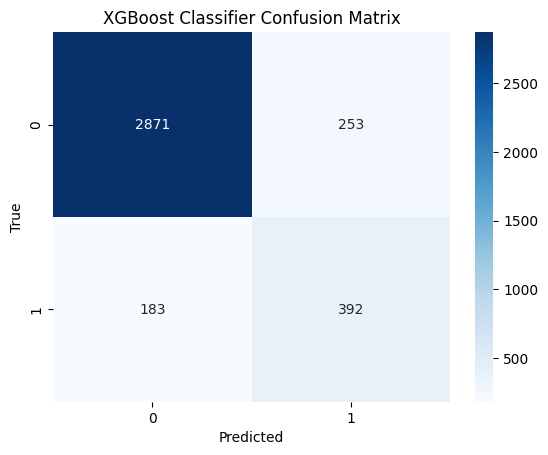

In [109]:
# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print("XGBoost Classifier Accuracy:", accuracy_score(y_test, xgb_pred))
print("XGBoost Classifier Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("XGBoost Tree Classification Report:\n", classification_report(y_test, xgb_pred))
report_dict['XGBoost Forest Classifier'] = classification_report(y_test, xgb_pred, output_dict=True)


# XGBoost Classifier Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(xgb_cm, annot=True, cmap='Blues', fmt='g')
plt.title('XGBoost Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classifier Accuracy: 0.8732089753987564
Logistic Regression Classifier Confusion Matrix:
 [[2823  301]
 [ 168  407]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      3124
           1       0.57      0.71      0.63       575

    accuracy                           0.87      3699
   macro avg       0.76      0.81      0.78      3699
weighted avg       0.89      0.87      0.88      3699



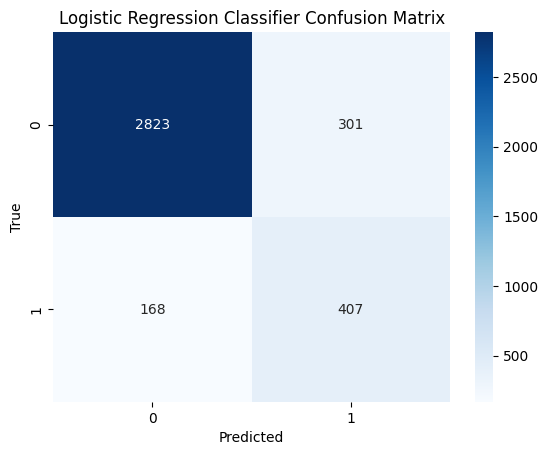

In [110]:
# Logistic Regression Classifier
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
print("Logistic Regression Classifier Accuracy:", accuracy_score(y_test, logreg_pred))
print("Logistic Regression Classifier Confusion Matrix:\n", confusion_matrix(y_test, logreg_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, logreg_pred))
report_dict['Logistic Regression Classifier'] = classification_report(y_test, logreg_pred, output_dict=True)

# Logistic Regression Classifier Confusion Matrix
logreg = confusion_matrix(y_test, logreg_pred)
sns.heatmap(logreg, annot=True, cmap='Blues', fmt='g')
plt.title('Logistic Regression Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


KNN Classifier Accuracy: 0.7642606109759394
KNN Classifier Confusion Matrix:
 [[2487  637]
 [ 235  340]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85      3124
           1       0.35      0.59      0.44       575

    accuracy                           0.76      3699
   macro avg       0.63      0.69      0.64      3699
weighted avg       0.83      0.76      0.79      3699



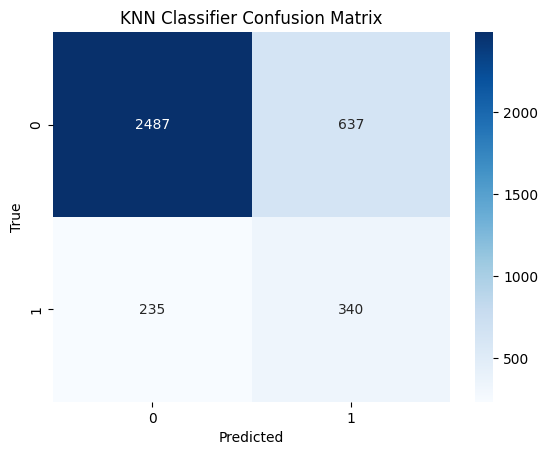

In [111]:



# KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KNN Classifier Accuracy:", accuracy_score(y_test, knn_pred))
print("KNN Classifier Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("KNN Classification Report:\n", classification_report(y_test, knn_pred))
report_dict['KNN Classifier'] = classification_report(y_test, knn_pred, output_dict=True)


# KNN Classifier Confusion Matrix
knn = confusion_matrix(y_test, knn_pred)
sns.heatmap(knn, annot=True, cmap='Blues', fmt='g')
plt.title('KNN Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


SVM Classifier Accuracy: 0.7204649905379832
SVM Classifier Confusion Matrix:
 [[2230  894]
 [ 140  435]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.71      0.81      3124
           1       0.33      0.76      0.46       575

    accuracy                           0.72      3699
   macro avg       0.63      0.74      0.63      3699
weighted avg       0.85      0.72      0.76      3699



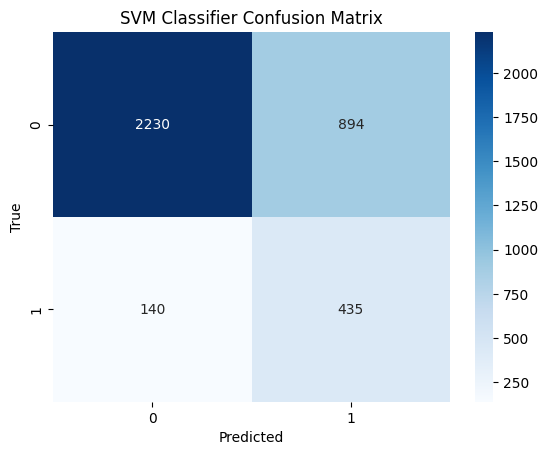

In [112]:

#SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("SVM Classifier Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Classifier Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))
report_dict['SVM Classifier'] = classification_report(y_test, svm_pred, output_dict=True)


# svm Classifier Confusion Matrix
svm = confusion_matrix(y_test, svm_pred)
sns.heatmap(svm, annot=True, cmap='Blues', fmt='g')
plt.title('SVM Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Gaussian Naive Bayes Classifier Accuracy: 0.7742633144092999
Gaussian Naive Bayes Classifier Confusion Matrix:
 [[2483  641]
 [ 194  381]]
Gaussian Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.86      3124
           1       0.37      0.66      0.48       575

    accuracy                           0.77      3699
   macro avg       0.65      0.73      0.67      3699
weighted avg       0.84      0.77      0.80      3699



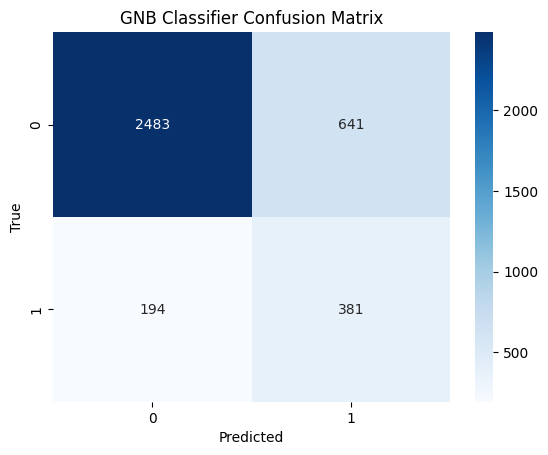

In [113]:
# Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
print("Gaussian Naive Bayes Classifier Accuracy:", accuracy_score(y_test, gnb_pred))
print("Gaussian Naive Bayes Classifier Confusion Matrix:\n", confusion_matrix(y_test, gnb_pred))
print("Gaussian Naive Bayes Classification Report:\n", classification_report(y_test, gnb_pred))
report_dict['Gaussian Naive Bayes Classifier'] = classification_report(y_test, gnb_pred, output_dict=True)


# gnb Classifier Confusion Matrix
gnb = confusion_matrix(y_test, gnb_pred)
sns.heatmap(gnb, annot=True, cmap='Blues', fmt='g')
plt.title('GNB Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



Multilayer Perceptron Classifier Accuracy: 0.8115706947823736
Multilayer Perceptron Classifier Confusion Matrix:
 [[2561  563]
 [ 134  441]]
Multilayer Perceptron Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88      3124
           1       0.44      0.77      0.56       575

    accuracy                           0.81      3699
   macro avg       0.69      0.79      0.72      3699
weighted avg       0.87      0.81      0.83      3699



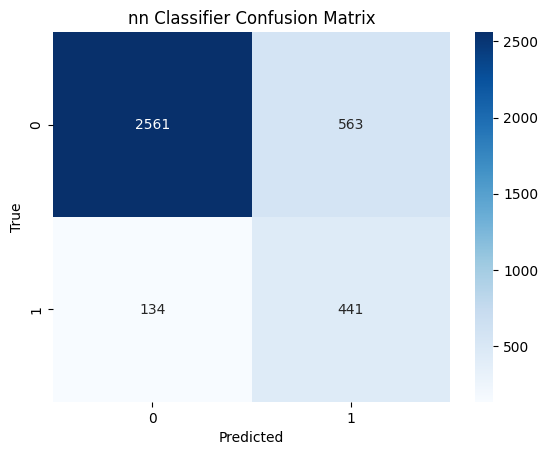

In [114]:
# Multilayer Perceptron Classifier(NN)
nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)
print("Multilayer Perceptron Classifier Accuracy:", accuracy_score(y_test, nn_pred))
print("Multilayer Perceptron Classifier Confusion Matrix:\n", confusion_matrix(y_test, nn_pred))
print("Multilayer Perceptron Classifier Classification Report:\n", classification_report(y_test, nn_pred))
report_dict['Multilayer Perceptron Classifier'] = classification_report(y_test, gnb_pred, output_dict=True)



# nn Classifier Confusion Matrix
nn = confusion_matrix(y_test, nn_pred)
sns.heatmap(nn, annot=True, cmap='Blues', fmt='g')
plt.title('nn Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


The results of various classifiers for online shoppers' intention prediction are as follows:

**Decision Tree Classifier**: Achieved an accuracy of 83.94% with a higher precision and recall for class 0 (no revenue) compared to class 1 (revenue). The f1-score indicates better performance for class 0.

**Random Forest Classifier**: Achieved an accuracy of 88.43% with higher precision and recall for class 0. It also shows a relatively higher f1-score for class 0, indicating better overall performance.

**XGBoost Forest Classifier**: Achieved an accuracy of 88.21% with a similar pattern to the Random Forest Classifier, showing better performance for class 0.

**Logistic Regression Classifier**: Achieved an accuracy of 87.32% with higher precision and recall for class 0. The f1-score indicates relatively balanced performance between the two classes.

**KNN Classifier**: Achieved an accuracy of 76.43% with a significant difference in precision and recall between the two classes. It shows better performance for class 0.

**SVM Classifier**: Achieved an accuracy of 72.05% with higher precision and recall for class 0. The f1-score indicates better overall performance for class 0.

**Gaussian Naive Bayes Classifier**: Achieved an accuracy of 77.43% with higher precision and recall for class 0. The f1-score indicates better performance for class 0.

**Multilayer Perceptron Classifier**: Achieved an accuracy of 81.15% with higher precision and recall for class 0. The f1-score indicates better performance for class 0.

In general, the Random Forest Classifier and XGBoost Forest Classifier have the highest accuracy and balanced performance for both revenue and no revenue classes, making them potentially ideal models for forecasting the intents of online customers.

The observed increase in accuracy after removing PCA and Standard Scaler can be due to two key considerations.
To begin, the option to keep all attributes without dimensionality reduction (PCA) implies that each characteristic in the dataset significantly contributes to predicting the output variable. 
Second, it's possible that the dataset has intrinsic scaling qualities or has already been scaled adequately. This feature allows the models to operate well without the need for additional scaling using Standard Scaler. 